In [2]:
library(MASS)
library(vcd)
library(vcdExtra)

In [3]:
## Educational Aspirations in Wisconsin
mydata <- c(749,35,233,133, 
            627,38,330,303, 
            420,37,374,467, 
            153,26,266,800)

var.levels <- expand.grid(Plan = c("No", "Yes"),
                    Encouragement = c("Low", "High"),
                    SES = c("Lower", "Lower_Middle", 
                            "Upper_Middle", "Higher"))

Wis.freq <- data.frame(var.levels, count = mydata)

Wis.tab <- xtabs(count ~ Encouragement + Plan + SES, 
                 data = Wis.freq)

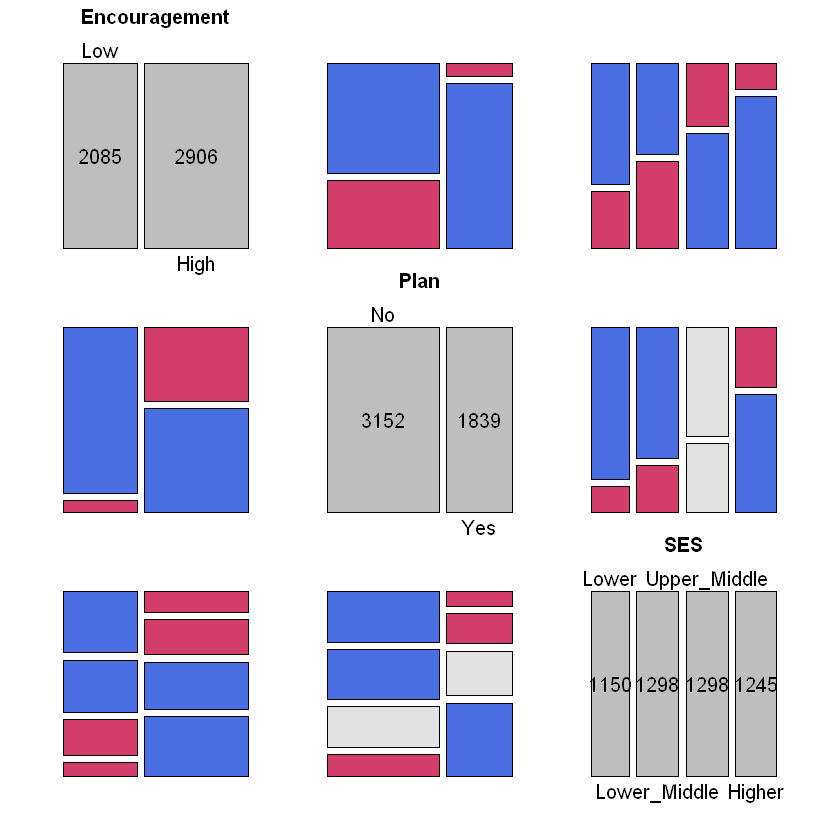

In [4]:
pairs(Wis.tab, gp=shading_max)

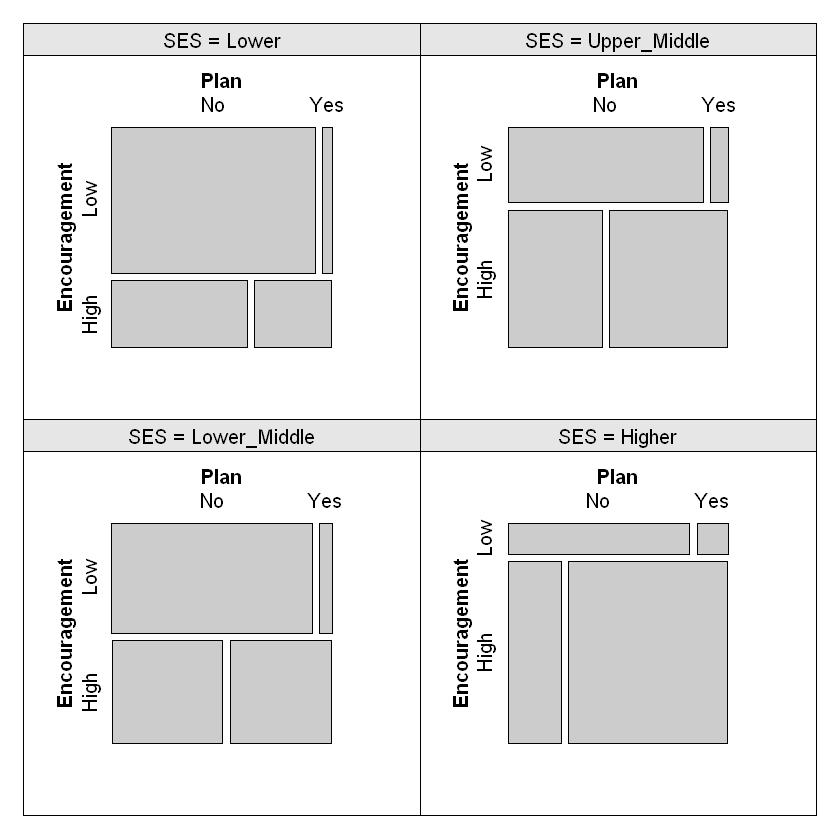

In [5]:
cotabplot(Wis.tab, cond="SES")

In [6]:
doubledecker(Plan ~ SES + Encouragement, data = Wis.tab)

In [7]:
## convert table to dataframe for glm():
Wis.df <- as.data.frame(Wis.tab)

## Complete Independence:
## [E][P][S]
Wis.glm0 <- glm(Freq ~ Encouragement + Plan + SES,
                data = Wis.df, family = "poisson")
Wis.glm0


Call:  glm(formula = Freq ~ Encouragement + Plan + SES, family = "poisson", 
    data = Wis.df)

Coefficients:
      (Intercept)  EncouragementHigh            PlanYes    SESLower_Middle  
          5.71505            0.33201           -0.53882            0.12106  
  SESUpper_Middle          SESHigher  
          0.12106            0.07937  

Degrees of Freedom: 15 Total (i.e. Null);  10 Residual
Null Deviance:	    3211 
Residual Deviance: 2714 	AIC: 2840

In [8]:
## Joint Independence:
## [EP][S]
Wis.glm1 <- glm(Freq ~ Encouragement * Plan + SES,
                data = Wis.df, family = "poisson")

## [E][PS]
Wis.glm2 <- glm(Freq ~ Encouragement + Plan * SES,
                data = Wis.df, family = "poisson")

## [P][ES]
Wis.glm3 <- glm(Freq ~ Plan + Encouragement * SES,
                data = Wis.df, family = "poisson")

In [9]:
## Conditional Independence:
## [EP][ES]
Wis.glm4 <- glm(Freq ~ Encouragement * (Plan + SES),
                data = Wis.df, family = "poisson")

## [SE][SP]
Wis.glm5 <- glm(Freq ~ SES * (Encouragement + Plan),
                data = Wis.df, family = "poisson")

## [PE][PS]
Wis.glm6 <- glm(Freq ~ Plan * (Encouragement + SES),
                data = Wis.df, family = "poisson")

In [10]:
## Homogeneous Association:
## [ES][PE][PS]
Wis.glm7 <- glm(Freq ~ (Plan + Encouragement + SES)^2,
                data = Wis.df, family = "poisson")

In [11]:
## Compare all models:
LRstats(Wis.glm0,
        Wis.glm1, Wis.glm2, Wis.glm3,
        Wis.glm4, Wis.glm5, Wis.glm6,
        Wis.glm7)

## Homogeneous association:
## We conclude that we have no evidence against the hypothesis that all three variables are associated, 
## but the association between any two is the same at all levels of the third. 
## In particular, we may conclude that the association between 
## parental encouragement E and college plans P is the same in all social strata.

AIC       BIC       LR Chisq    Df Pr(>Chisq)   
Wis.glm0 2839.7718 2844.4073 2713.953832 10  0.000000e+00
Wis.glm1 1219.8580 1225.2661 1092.039990  9 2.420486e-229
Wis.glm2 2052.2170 2059.1703 1920.399000  7  0.000000e+00
Wis.glm3 2009.1996 2016.1529 1877.381628  7  0.000000e+00
Wis.glm4  389.2857  397.0116  255.467786  6  2.781360e-52
Wis.glm5 1221.6448 1230.9158 1083.826795  4 2.425115e-233
Wis.glm6  432.3031  440.0290  298.485157  6  1.727217e-61
Wis.glm7  141.3934  151.4371    1.575468  3  6.649650e-01

In [12]:
plot(oddsratio(Wis.tab, log=FALSE))

In [14]:
## Test for Homogeneity of Odds Ratios:
library(DescTools)
woolf_test(Wis.tab)      ## library(vcd)
BreslowDayTest(Wis.tab)  ## library(DescTools), only work for 2x2xk


	Woolf-test on Homogeneity of Odds Ratios (no 3-Way assoc.)

data:  Wis.tab
X-squared = 1.5679, df = 3, p-value = 0.6667



	Breslow-Day test on Homogeneity of Odds Ratios

data:  Wis.tab
X-squared = 1.5731, df = 3, p-value = 0.6655


In [15]:
## CMH test for conditional independence.
## assumption: there is no three-way interaction.
mantelhaen.test(Wis.tab)


	Mantel-Haenszel chi-squared test with continuity correction

data:  Wis.tab
Mantel-Haenszel X-squared = 1014.6, df = 1, p-value < 2.2e-16
alternative hypothesis: true common odds ratio is not equal to 1
95 percent confidence interval:
 12.04667 17.77345
sample estimates:
common odds ratio 
         14.63253 


Warning message:
"no formula provided, assuming ~Encouragement + Plan + SES
"


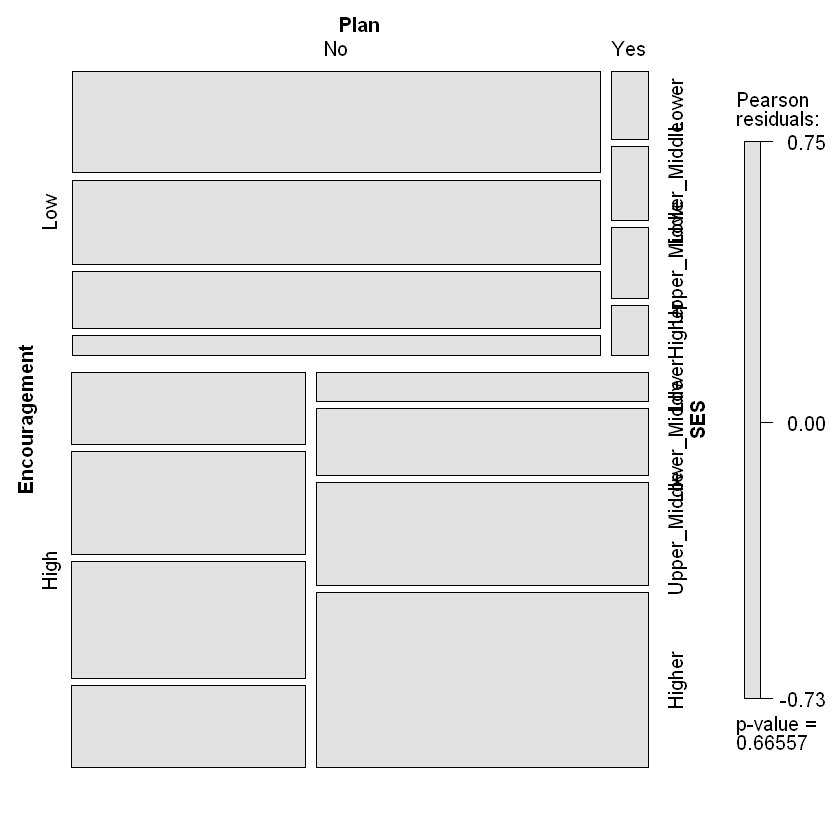

In [16]:
## Show Pearson residuals on mosaic plot:
mosaic(Wis.glm7)  ## [ES][PE][PS]

In [17]:
## Extract residuals and plot:
pearson.residual.glm7 <- residuals(Wis.glm7, type="pearson")
standard.residual.glm7 <- rstandard(Wis.glm7)

par(mfrow=c(1,2), pch=19, pty="s")
plot( pearson.residual.glm7 )
plot( standard.residual.glm7 )

In [18]:
## Equivalent Logit model of homogeneous association ([ES][PE][PS]):
Wis.glm7.lg <- glm(Plan=="Yes" ~ Encouragement + SES, 
                   data = Wis.df, weights = Freq, 
                   family = "binomial")
Wis.glm7.lg


Call:  glm(formula = Plan == "Yes" ~ Encouragement + SES, family = "binomial", 
    data = Wis.df, weights = Freq)

Coefficients:
      (Intercept)  EncouragementHigh    SESLower_Middle    SESUpper_Middle  
          -3.1950             2.6829             0.4201             0.7385  
        SESHigher  
           1.5931  

Degrees of Freedom: 15 Total (i.e. Null);  11 Residual
Null Deviance:	    6569 
Residual Deviance: 4694 	AIC: 4704

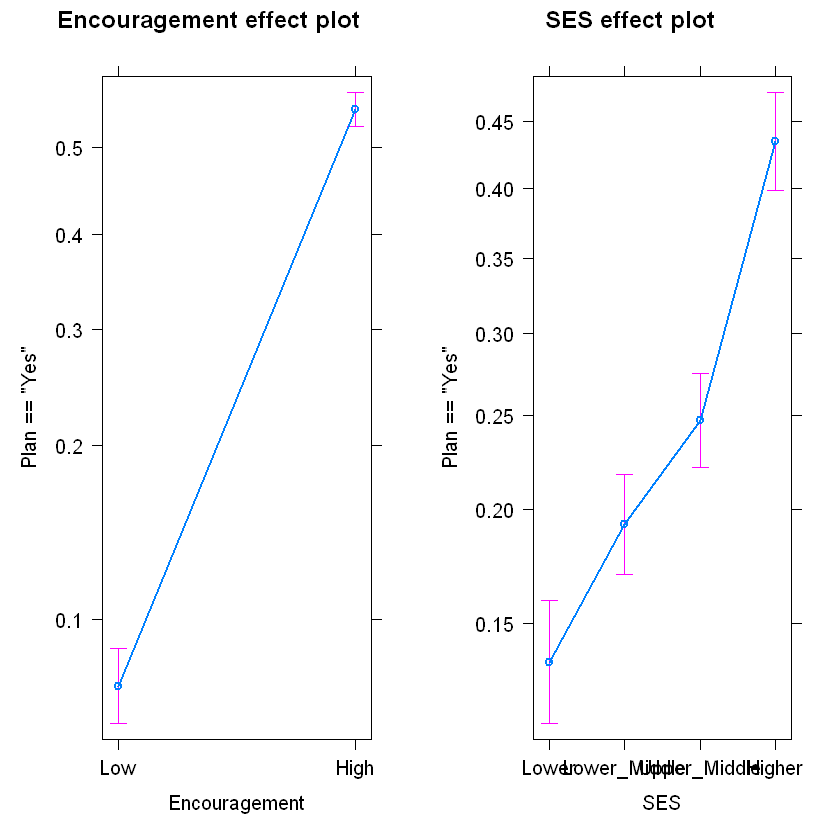

In [20]:
## The logit model is easier to interpret.
## Effect plots for the Equivalent Logit model:
library(effects)
plot( allEffects(Wis.glm7.lg) )